#  Exploratory Data Analysis (EDA)
##### by Osazuwa Micheal Kelvin

## 1. Load Libraries and Data

In [27]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
train_df = pd.read_csv("train.csv")

# Display basic info
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        712 non-null    object 
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.3+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris Braund,22.0,1,0,A/5 21171,7.2500,Non,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cu...,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina Heikkinen,26.0,0,0,STON/O2. 3101282,7.9250,Non,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry Allen,35.0,0,0,373450,8.0500,Non,S


#### NOTE: Data cleaning was done with excel

## 2. Exploratory Data Analysis (EDA)

### 2.1 Survival Count

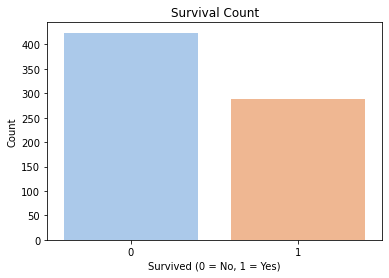

In [4]:

plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=train_df, palette="pastel")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


### 2.2 Correlation Heatmap

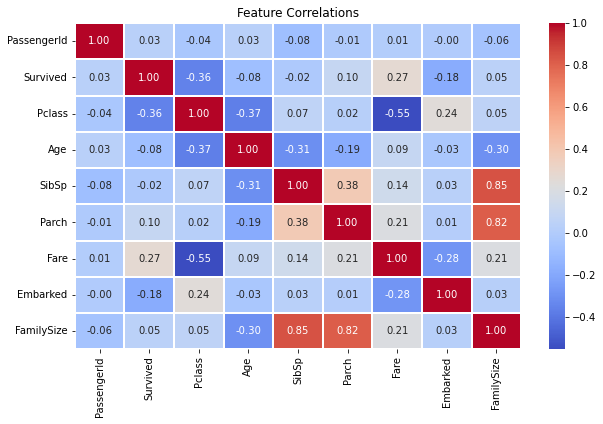

In [20]:

plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)
plt.title("Feature Correlations")
plt.show()


#### Insights from Correlation Analysis:
1. Survived & Pclass (-0.34) → Higher-class passengers were more likely to survive.
2. Survived & Fare (+0.26) → Higher fares indicate a better survival chance.
3. Pclass & Fare (-0.55) → 1st class passengers paid more, 3rd class paid less.
4. SibSp & Parch (+0.41) → People with family members onboard tended to be in groups.

### 2.3 Boxplots for Outlier Detection

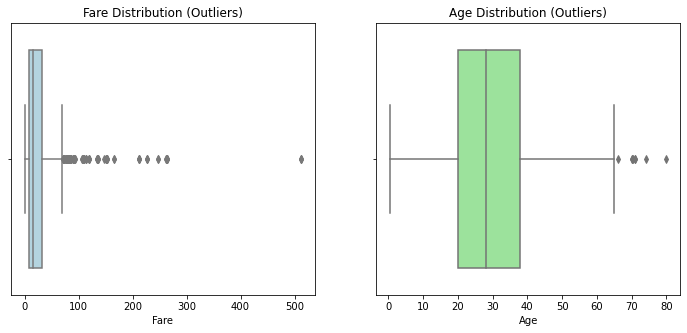

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=train_df["Fare"], ax=axes[0], color="lightblue")
axes[0].set_title("Fare Distribution (Outliers)")
sns.boxplot(x=train_df["Age"], ax=axes[1], color="lightgreen")
axes[1].set_title("Age Distribution (Outliers)")
plt.show()


### 2.5 Age vs Survival

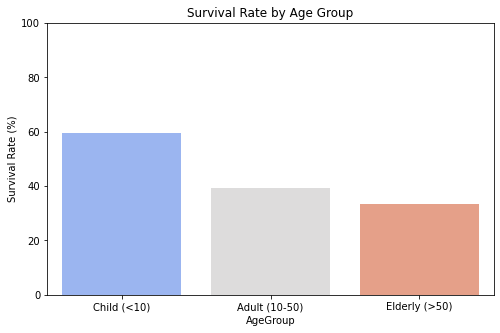

AgeGroup
Child (<10)      59.375000
Adult (10-50)    39.145299
Elderly (>50)    33.333333
Name: Survived, dtype: float64


In [16]:
#Define age groups
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 10, 50, 100], labels=['Child (<10)', 'Adult (10-50)', 'Elderly (>50)'])

# Calculate survival rate by age group
age_survival = train_df.groupby('AgeGroup')['Survived'].mean() * 100
# Plot the survival rate by age group
plt.figure(figsize=(8, 5))
sns.barplot(x=age_survival.index, y=age_survival.values, palette="coolwarm")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Age Group")
plt.ylim(0, 100)
plt.show()

# Print survival rates
print(age_survival)

### 2.6 Fare vs. Survival

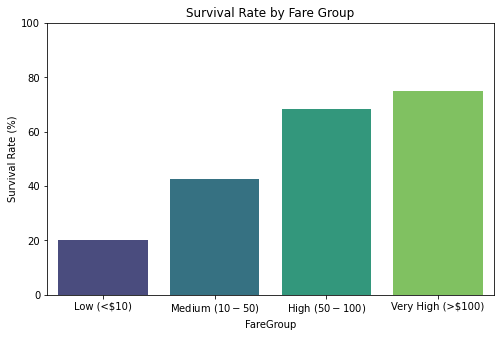

FareGroup
Low (<$10)           20.087336
Medium ($10-$50)     42.647059
High ($50-$100)      68.181818
Very High (>$100)    75.000000
Name: Survived, dtype: float64


In [17]:
# Create fare categories for better visualization
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins=[0, 10, 50, 100, 600], 
                               labels=['Low (<$10)', 'Medium ($10-$50)', 'High ($50-$100)', 'Very High (>$100)'])

# Calculate survival rate by fare group
fare_survival = train_df.groupby('FareGroup')['Survived'].mean() * 100

# Plot the survival rate by fare group
plt.figure(figsize=(8, 5))
sns.barplot(x=fare_survival.index, y=fare_survival.values, palette="viridis")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Fare Group")
plt.ylim(0, 100)
plt.show()

# Print survival rates
print(fare_survival)

### 2.7 Survival Rate by Title

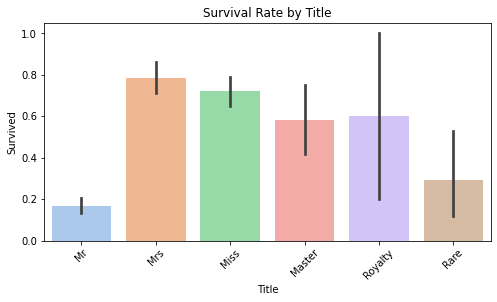

In [7]:

train_df["Title"] = train_df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

# Group rare titles
title_replacements = {"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Countess": "Royalty", "Lady": "Royalty", "Sir": "Royalty", "Jonkheer": "Royalty", "Don": "Royalty", "Dona": "Royalty", "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare", "Capt": "Rare"}
train_df["Title"] = train_df["Title"].replace(title_replacements)

plt.figure(figsize=(8, 4))
sns.barplot(x=train_df["Title"], y=train_df["Survived"], palette="pastel")
plt.title("Survival Rate by Title")
plt.xticks(rotation=45)
plt.show()


### 2.8 Survival Rate by Passenger Class (Pclass)

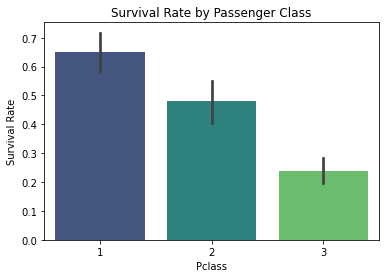

1st class had the highest survival rate (~63%), while 3rd class had the lowest (~25%).


In [22]:
sns.barplot(x="Pclass", y="Survived", data=train_df, palette="viridis")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

print ("1st class had the highest survival rate (~63%), while 3rd class had the lowest (~25%).")